# 4.10: Coding Etiquette & Excel Reporting


## This Script Contents:
### 1.Importing Libraries & datasets
### 2.Consider security Implications
### 3.Comparing customer behavior in different geographic areas
#### 3.1. Regional Segmentation of data
#### 3.2.Checking spending habits across regions
### 4.Exclusion flag for low-activity customers 
### 5.Export the dataframe with High activity customers


# 01.Importing Libraries

In [4]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# Importing datasets

In [5]:
path=r'/Users/s.cheriyanath/sruthy/notebook/4.10'  

In [6]:
df_final=pd.read_pickle(os.path.join(path,'original data','df_combined.pkl'))
df_department=pd.read_csv(os.path.join(path,'original data','departments_wrangled.csv'))

In [7]:
# Explore dataset 
df_final.shape

(32404859, 31)

# 02.Consider security implications

#Current data has no security implication.PII data was removed from the customer data set during wrangling and consistency check (Task 4.9- Part 1)

# 03.The Instacart officers are interested in comparing customer behavior in different geographic areas. Create a regional segmentation of the data. You’ll need to create a “Region” column based on the “State” column from your customers data set.

## 1.Regional Segmentation of data

In [8]:
# Create 'Region' column based on 'State' column
#Region 1
df_final.loc[df_final['State'].isin(['Maine','New Hampshire','Vermont','Massachusetts','Rhode Island','Connecticut','New York','Pennsylvania','New Jersey']),'Region']='Northeast'
#Region 2
df_final.loc[df_final['State'].isin(['Wisconsin','Michigan','Illinois','Indiana','Ohio','North Dakota','South Dakota','Nebraska','Kansas','Minnesota','Iowa','Missouri']),'Region']='Midwest'
#Region 3
df_final.loc[df_final['State'].isin(['Delaware','Maryland','District of Columbia','Virginia','West Virginia','North Carolina','South Carolina','Georgia','Florida','Kentucky','Tennessee','Mississippi','Alabama','Oklahoma','Texas','Arkansas','Louisiana']),'Region']='South'
#Region 4
df_final.loc[df_final['State'].isin(['Idaho','Montana','Wyoming','Nevada','Utah','Colorado','Arizona','New Mexico','Alaska','Washington','Oregon','California','Hawaii']),'Region']='West'


In [9]:
# Frequency count for 'Region' column
df_final['Region'].value_counts(dropna=False)

South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: Region, dtype: int64

In [10]:
# Check the length of 'Region' to verify all rows have been updated
len(df_final['Region'])

32404859

## 2. Determine whether there’s a difference in spending habits between the different U.S. regions. (Hint: You can do this by crossing the variable you just created with the spending flag.)

In [11]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32404859 entries, 0 to 32404858
Data columns (total 32 columns):
 #   Column                     Dtype   
---  ------                     -----   
 0   order_id                   int32   
 1   user_id                    int32   
 2   order_number               int8    
 3   order_day_of_week          int8    
 4   order_hour_of_day          int8    
 5   days_since_previous_order  float16 
 6   product_id                 int32   
 7   add_to_cart_order          int32   
 8   reordered                  int8    
 9   product_name               object  
 10  aisle_id                   int8    
 11  department_id              int8    
 12  prices                     float64 
 13  _merge                     category
 14  price_label                object  
 15  busiest day                object  
 16  busiest_days               object  
 17  busiest_period_of_day      object  
 18  max_order                  int8    
 19  Loyalty_Flag       

In [12]:
# create a crosstab between 'Region' & 'spending_flag'
Region_spending_habits=pd.crosstab(df_final['Region'],df_final['spending_flag'],dropna=False)

In [13]:
Region_spending_habits

spending_flag,High spender,Low spender
Region,,
Midwest,155975,7441350
Northeast,108225,5614511
South,209691,10582194
West,160354,8132559


## The Region with most spending is South and least spending is Northeast

 ## 04.The Instacart CFO isn’t interested in customers who don’t generate much revenue for the app.Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure you export this sample.

In [14]:
# create activity flag based on number of orders
df_final.loc[df_final['max_order']<5,'Activity_flag']='Low activity'
df_final.loc[df_final['max_order']>=5,'Activity_flag']='High activity'

In [15]:
df_final.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_previous_order,product_id,add_to_cart_order,reordered,product_name,...,order_frequency_flag,Gender,State,Age,Date_Joined,No_of_Dependants,Family_status,Income,Region,Activity_flag
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High activity
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High activity
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High activity
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High activity
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High activity


In [16]:
# Frequency count for column'Activity_flag'
df_final['Activity_flag'].value_counts(dropna=False)

High activity    30964564
Low activity      1440295
Name: Activity_flag, dtype: int64

In [17]:
#create a subset which excludes low activity customers
df_high_activity=df_final[df_final['Activity_flag']=='High activity']

In [18]:
df_high_activity.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_previous_order,product_id,add_to_cart_order,reordered,product_name,...,order_frequency_flag,Gender,State,Age,Date_Joined,No_of_Dependants,Family_status,Income,Region,Activity_flag
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High activity
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High activity
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High activity
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High activity
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High activity


In [19]:
df_high_activity.shape

(30964564, 33)

In [20]:
#create a subset which low activity customers
df_low_activity=df_final[df_final['Activity_flag']=='Low activity']

In [21]:
df_low_activity.shape

(1440295, 33)

In [22]:
# To check the accuracy of subset 
len(df_high_activity)+len(df_low_activity)

32404859

In [23]:
# Export the dataframe with High activity customers
df_high_activity.to_pickle(os.path.join(path,'prepared data','df_high_activity_customers.pkl'))

# 05.Customer profiling

### The marketing and business strategy units at Instacart want to create more-relevant marketing strategies for different products and are, thus, curious about customer profiling in their database. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. You might also use the “orders_day_of_the_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles. (Hint: As an example, try thinking of what characteristics would lead you to the profile “Single adult” or “Young parent.”)

## Based on Age

In [24]:
#check descriptive statistics of age
df_high_activity['Age'].describe()

count    3.096456e+07
mean     4.946803e+01
std      1.848528e+01
min      1.800000e+01
25%      3.300000e+01
50%      4.900000e+01
75%      6.500000e+01
max      8.100000e+01
Name: Age, dtype: float64

#### Age ranges for creating age group:  Young Adult : 18-39, Middle-Aged : 40-65, Senior : 65+

In [25]:
# Create age_group column 
df_high_activity.loc[(df_high_activity['Age']>=18) & (df_high_activity['Age']<40),'age_group']='Young Adult'
df_high_activity.loc[(df_high_activity['Age']>=40) & (df_high_activity['Age']<65),'age_group']='Middle-Aged'
df_high_activity.loc[(df_high_activity['Age']>=65) ,'age_group']='Senior'

/var/folders/5d/3dgj051j1_x342byp3fk8qy9dh2rn5/T/ipykernel_91739/2732133244.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_high_activity.loc[(df_high_activity['Age']>=18) & (df_high_activity['Age']<40),'age_group']='Young Adult'


In [26]:
# Check age_group counts
df_high_activity['age_group'].value_counts(dropna = False)

Middle-Aged    12103910
Young Adult    10665110
Senior          8195544
Name: age_group, dtype: int64

## Based on Income

In [27]:
#check descriptive statistics of income
df_high_activity['Income'].describe()

count    3.096456e+07
mean     9.967587e+04
std      4.314187e+04
min      2.590300e+04
25%      6.729200e+04
50%      9.676500e+04
75%      1.281020e+05
max      5.939010e+05
Name: Income, dtype: float64

#### Income ranges for creating income group based on quartiles: Low income : <70000 ,Middle income: 70000-120000, High income: >120000

In [28]:
#Create income_group column
df_high_activity.loc[(df_high_activity['Income']<70000),'income_group']='Low income'
df_high_activity.loc[(df_high_activity['Income']>=70000) & (df_high_activity['Income']<=120000),'income_group']='Middle income'
df_high_activity.loc[(df_high_activity['Income']>120000) ,'income_group']='High income'

/var/folders/5d/3dgj051j1_x342byp3fk8qy9dh2rn5/T/ipykernel_91739/2722254653.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_high_activity.loc[(df_high_activity['Income']<70000),'income_group']='Low income'


In [29]:
# Frequency count for column'income_group'
df_high_activity['income_group'].value_counts(dropna=False)

Middle income    13264518
High income       9179513
Low income        8520533
Name: income_group, dtype: int64

## Based on No of dependants

In [30]:
# Check descriptive statistics
df_high_activity['No_of_Dependants'].describe()

count    3.096456e+07
mean     1.501819e+00
std      1.118896e+00
min      0.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      3.000000e+00
max      3.000000e+00
Name: No_of_Dependants, dtype: float64

In [31]:
 #Create a crosstab between No_of_Dependants and Family_status
Dependant_status = pd.crosstab(df_high_activity['Family_status'], df_high_activity['No_of_Dependants'], dropna = False)

In [32]:
Dependant_status

No_of_Dependants,0,1,2,3
Family_status,,,,
divorced/widowed,2645271,0,0,0
living with parents and siblings,0,508045,484658,488469
married,0,7211061,7248603,7284047
single,5094410,0,0,0


In [33]:
# Create a household_size group
df_high_activity.loc[df_high_activity['No_of_Dependants'] == 0, 'household_size'] = 'Single Household'
df_high_activity.loc[(df_high_activity['No_of_Dependants'] == 1) | (df_high_activity['No_of_Dependants'] == 2), 'household_size'] = 'Medium Household'
df_high_activity.loc[df_high_activity['No_of_Dependants'] == 3, 'household_size'] = 'Large Household'

/var/folders/5d/3dgj051j1_x342byp3fk8qy9dh2rn5/T/ipykernel_91739/4264207109.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_high_activity.loc[df_high_activity['No_of_Dependants'] == 0, 'household_size'] = 'Single Household'


In [34]:
# Check the frequency of household_size column
df_high_activity['household_size'].value_counts(dropna = False)

Medium Household    15452367
Large Household      7772516
Single Household     7739681
Name: household_size, dtype: int64

In [35]:
# Create a crosstab between household_size and Family_status
family_size = pd.crosstab(df_high_activity['Family_status'], df_high_activity['household_size'], dropna = False)

In [36]:
family_size

household_size,Large Household,Medium Household,Single Household
Family_status,,,
divorced/widowed,0,0,2645271
living with parents and siblings,488469,992703,0
married,7284047,14459664,0
single,0,0,5094410


## Based on Department

In [37]:
df_department


,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [38]:
# Create a data dictionary for departments
data_dict=dict(zip(df_department['department_id'],df_department['department']))

In [39]:
data_dict


{1: 'frozen',
 2: 'other',
 3: 'bakery',
 4: 'produce',
 5: 'alcohol',
 6: 'international',
 7: 'beverages',
 8: 'pets',
 9: 'dry goods pasta',
 10: 'bulk',
 11: 'personal care',
 12: 'meat seafood',
 13: 'pantry',
 14: 'breakfast',
 15: 'canned goods',
 16: 'dairy eggs',
 17: 'household',
 18: 'babies',
 19: 'snacks',
 20: 'deli',
 21: 'missing'}

In [40]:
# create column 'department' 
df_high_activity['Department']=df_high_activity['department_id'].map(data_dict)

/var/folders/5d/3dgj051j1_x342byp3fk8qy9dh2rn5/T/ipykernel_91739/3520195976.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_high_activity['Department']=df_high_activity['department_id'].map(data_dict)


In [41]:
# check department column and accuracy
df_high_activity['Department'].value_counts(dropna=False)

produce            9079273
dairy eggs         5177182
snacks             2766406
beverages          2571901
frozen             2121731
pantry             1782705
bakery             1120828
canned goods       1012074
deli               1003834
dry goods pasta     822136
household           699857
meat seafood        674781
breakfast           670850
personal care       424306
babies              410392
international       255991
alcohol             144627
pets                 93060
missing              64768
other                34411
bulk                 33451
Name: Department, dtype: int64

In [42]:
df_high_activity['Department'].value_counts(dropna=False).sum()

30964564

In [43]:
df_high_activity.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30964564 entries, 0 to 32404854
Data columns (total 37 columns):
 #   Column                     Dtype   
---  ------                     -----   
 0   order_id                   int32   
 1   user_id                    int32   
 2   order_number               int8    
 3   order_day_of_week          int8    
 4   order_hour_of_day          int8    
 5   days_since_previous_order  float16 
 6   product_id                 int32   
 7   add_to_cart_order          int32   
 8   reordered                  int8    
 9   product_name               object  
 10  aisle_id                   int8    
 11  department_id              int8    
 12  prices                     float64 
 13  _merge                     category
 14  price_label                object  
 15  busiest day                object  
 16  busiest_days               object  
 17  busiest_period_of_day      object  
 18  max_order                  int8    
 19  Loyalty_Flag       

# 06.Visualizations to show the distribution of customer profiles

(array([0, 1, 2]),
 [Text(0, 0, 'Middle-Aged'), Text(1, 0, 'Young Adult'), Text(2, 0, 'Senior')])

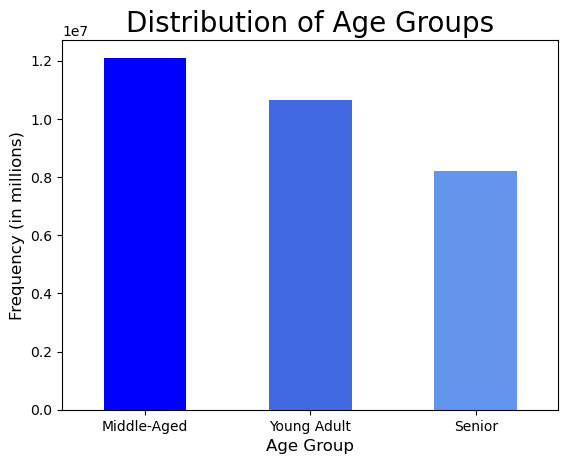

In [44]:
# Distribution of age_group
bar_age_group = df_high_activity['age_group'].value_counts().plot.bar(color=['blue','royalblue','cornflowerblue'])

plt.title('Distribution of Age Groups', fontsize = 20)
plt.ylabel('Frequency (in millions)', fontsize = 12)
plt.xlabel('Age Group', fontsize = 12)
plt.xticks(rotation = 0)

(array([0, 1, 2]),
 [Text(0, 0, 'Middle income'),
  Text(1, 0, 'High income'),
  Text(2, 0, 'Low income')])

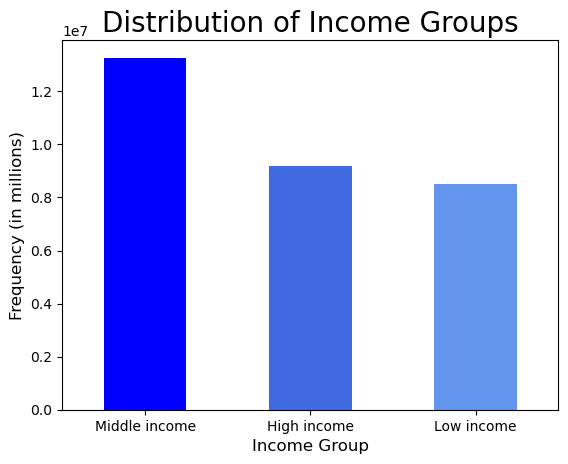

In [45]:
# Distribution of income_group
bar_income_group = df_high_activity['income_group'].value_counts().plot.bar(color=['blue','royalblue','cornflowerblue'])

plt.title('Distribution of Income Groups', fontsize = 20)
plt.ylabel('Frequency (in millions)', fontsize = 12)
plt.xlabel('Income Group', fontsize = 12)
plt.xticks(rotation = 0)

(array([0, 1, 2]),
 [Text(0, 0, 'Medium Household'),
  Text(1, 0, 'Large Household'),
  Text(2, 0, 'Single Household')])

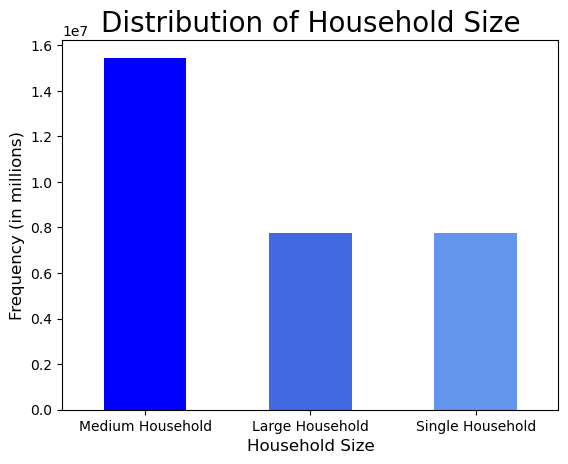

In [46]:
# Distribution of family_size
bar_household_size = df_high_activity['household_size'].value_counts().plot.bar(color=['blue','royalblue','cornflowerblue'])

plt.title('Distribution of Household Size', fontsize = 20)
plt.ylabel('Frequency (in millions)', fontsize = 12)
plt.xlabel('Household Size', fontsize = 12)
plt.xticks(rotation = 0)

Text(0, 0.5, 'Department')

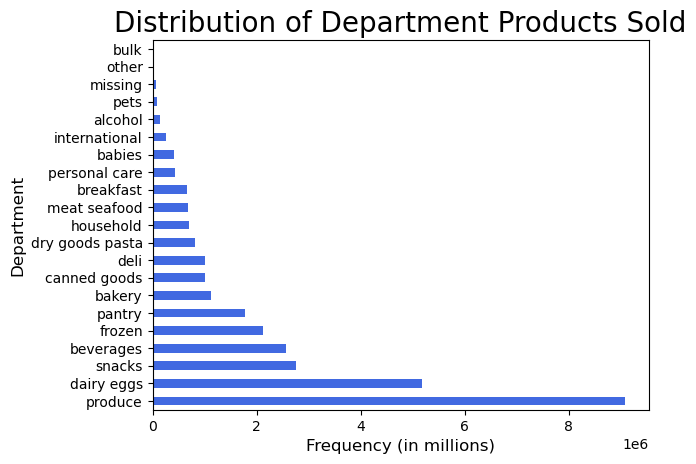

In [47]:
# Distribution of department product sold
bar_departments = df_high_activity['Department'].value_counts().plot.barh(color=['royalblue'])

plt.title('Distribution of Department Products Sold', fontsize = 20)
plt.xlabel('Frequency (in millions)', fontsize = 12)
plt.ylabel('Department', fontsize = 12)

# 07.Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

In [48]:
# Age_group frequency aggregation
df_high_activity.groupby('age_group').agg({'max_order' : ['mean', 'min', 'max']})

max_order        
                  mean min max
age_group                     
Middle-Aged  34.423941   5  99
Senior       34.326709   5  99
Young Adult  34.503729   5  99

In [49]:
# Age_group expenditure aggregation
df_high_activity.groupby('age_group').agg({'prices' : ['mean', 'min', 'max']})

prices           
                 mean  min   max
age_group                       
Middle-Aged  7.791529  1.0  25.0
Senior       7.796715  1.0  25.0
Young Adult  7.784818  1.0  25.0

In [50]:
# Income_group frequency aggregation
df_high_activity.groupby('income_group').agg({'max_order' : ['mean', 'min', 'max']})

max_order        
                    mean min max
income_group                    
High income    34.623992   5  99
Low income     33.824693   5  99
Middle income  34.674506   5  99

In [51]:
# Income_group expenditure aggregation
df_high_activity.groupby('income_group').agg({'prices' : ['mean', 'min', 'max']})

prices           
                   mean  min   max
income_group                      
High income    7.952117  1.0  25.0
Low income     7.358224  1.0  25.0
Middle income  7.956600  1.0  25.0

In [52]:
# Family_size frequency aggregation 
df_high_activity.groupby('household_size').agg({'max_order' : ['mean', 'min', 'max']})

max_order        
                       mean min max
household_size                     
Large Household   34.413518   5  99
Medium Household  34.306515   5  99
Single Household  34.675839   5  99

In [53]:
#Family_size expenditure aggregation 
df_high_activity.groupby('household_size').agg({'prices' : ['mean', 'min', 'max']})

prices           
                      mean  min   max
household_size                       
Large Household   7.792886  1.0  25.0
Medium Household  7.789957  1.0  25.0
Single Household  7.789550  1.0  25.0

# 08.Comparing customer profiles with regions and departments.

In [54]:
# Compare age_group across regions
age_region = pd.crosstab(df_high_activity['Region'], df_high_activity['age_group'], dropna = False)
age_region


age_group,Middle-Aged,Senior,Young Adult
Region,,,
Midwest,2874466,1904046,2483001
Northeast,2108141,1484807,1871737
South,3994431,2708461,3608247
West,3126872,2098230,2702125


Text(0.5, 0, 'Regions')

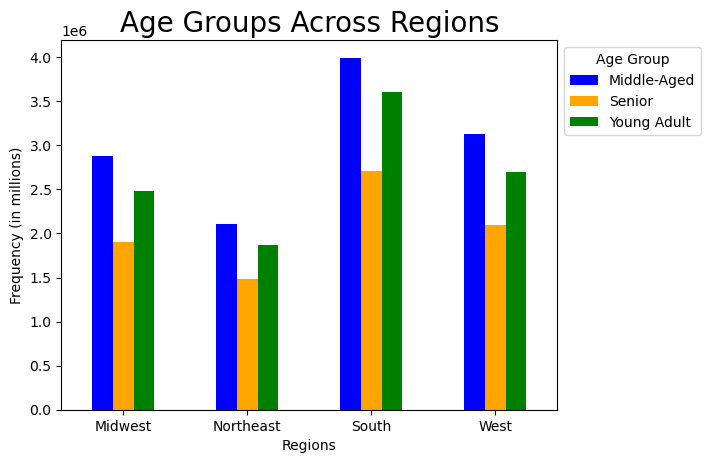

In [128]:
# Create a bar chart for age_group and region
bar_age_region = age_region.plot(kind = 'bar',rot=0, color = ['blue', 'orange', 'green'])

bar_age_region.legend(title = 'Age Group',bbox_to_anchor =  (1, 1))
plt.title('Age Groups Across Regions', fontsize = 20)
plt.ylabel('Frequency (in millions)')
plt.xlabel('Regions')

In [56]:
# Compare age groups across departments
age_department = pd.crosstab(df_high_activity['Department'], df_high_activity['age_group'], dropna = False)
age_department

age_group,Middle-Aged,Senior,Young Adult
Department,,,
alcohol,56278,36693,51656
babies,162732,106204,141456
bakery,438829,295997,386002
beverages,1013708,684020,874173
breakfast,263615,175296,231939
bulk,12882,8945,11624
canned goods,394849,267509,349716
dairy eggs,2015807,1368072,1793303
deli,392790,265199,345845


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 [Text(0, 0, 'alcohol'),
  Text(1, 0, 'babies'),
  Text(2, 0, 'bakery'),
  Text(3, 0, 'beverages'),
  Text(4, 0, 'breakfast'),
  Text(5, 0, 'bulk'),
  Text(6, 0, 'canned goods'),
  Text(7, 0, 'dairy eggs'),
  Text(8, 0, 'deli'),
  Text(9, 0, 'dry goods pasta'),
  Text(10, 0, 'frozen'),
  Text(11, 0, 'household'),
  Text(12, 0, 'international'),
  Text(13, 0, 'meat seafood'),
  Text(14, 0, 'missing'),
  Text(15, 0, 'other'),
  Text(16, 0, 'pantry'),
  Text(17, 0, 'personal care'),
  Text(18, 0, 'pets'),
  Text(19, 0, 'produce'),
  Text(20, 0, 'snacks')])

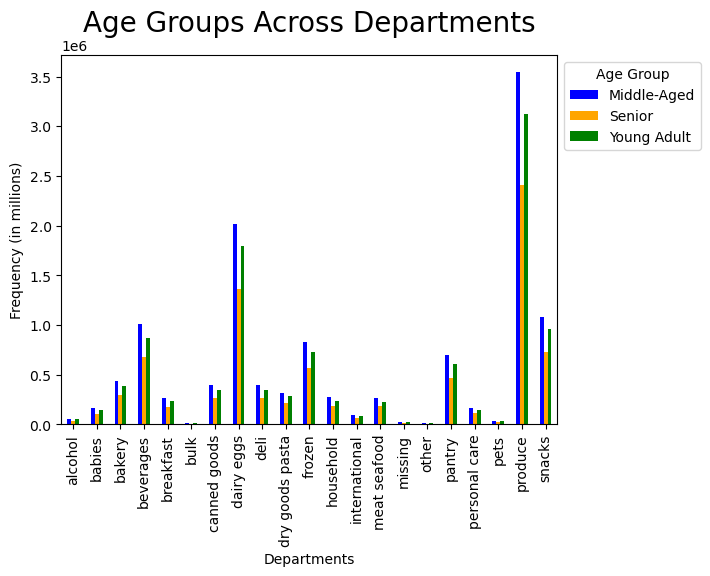

In [129]:
# Create a bar chart for age_group and region
bar_age_department = age_department.plot(kind = 'bar', rot = 0, color = ['blue', 'orange', 'green'])

bar_age_department.legend(title = 'Age Group', bbox_to_anchor = (1, 1))
plt.title('Age Groups Across Departments', fontsize = 20)
plt.ylabel('Frequency (in millions)')
plt.xlabel('Departments')
plt.xticks(rotation = 90)

In [58]:
# Compare income groups across regions
income_region = pd.crosstab(df_high_activity['Region'], df_high_activity['income_group'], dropna = False)
income_region

income_group,High income,Low income,Middle income
Region,,,
Midwest,2188923,1974266,3098324
Northeast,1628878,1486808,2348999
South,3023406,2849538,4438195
West,2338306,2209921,3379000


Text(0.5, 0, 'Regions')

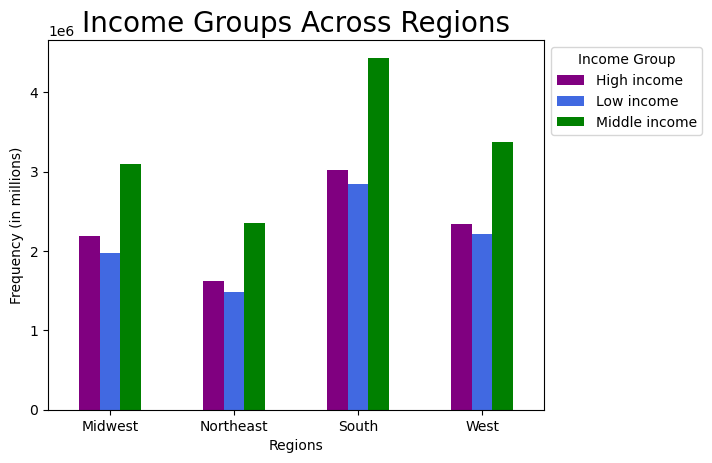

In [126]:
# Create a bar chart for income_group and Region
bar_income_region = income_region.plot(kind = 'bar', rot = 0, color = ['purple', 'royalblue', 'green'])
bar_income_region.legend(title = 'Income Group', bbox_to_anchor = (1, 1))
plt.title('Income Groups Across Regions', fontsize = 20)
plt.ylabel('Frequency (in millions)')
plt.xlabel('Regions')

In [60]:
# Compare income groups across departments
income_department = pd.crosstab(df_high_activity['Department'], df_high_activity['income_group'], dropna = False)
income_department

income_group,High income,Low income,Middle income
Department,,,
alcohol,46709,39962,57956
babies,126823,95171,188398
bakery,342739,292666,485423
beverages,730247,804236,1037418
breakfast,192284,204191,274375
bulk,8888,10267,14296
canned goods,314033,248530,449511
dairy eggs,1554757,1363806,2258619
deli,297176,273839,432819


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 [Text(0, 0, 'alcohol'),
  Text(1, 0, 'babies'),
  Text(2, 0, 'bakery'),
  Text(3, 0, 'beverages'),
  Text(4, 0, 'breakfast'),
  Text(5, 0, 'bulk'),
  Text(6, 0, 'canned goods'),
  Text(7, 0, 'dairy eggs'),
  Text(8, 0, 'deli'),
  Text(9, 0, 'dry goods pasta'),
  Text(10, 0, 'frozen'),
  Text(11, 0, 'household'),
  Text(12, 0, 'international'),
  Text(13, 0, 'meat seafood'),
  Text(14, 0, 'missing'),
  Text(15, 0, 'other'),
  Text(16, 0, 'pantry'),
  Text(17, 0, 'personal care'),
  Text(18, 0, 'pets'),
  Text(19, 0, 'produce'),
  Text(20, 0, 'snacks')])

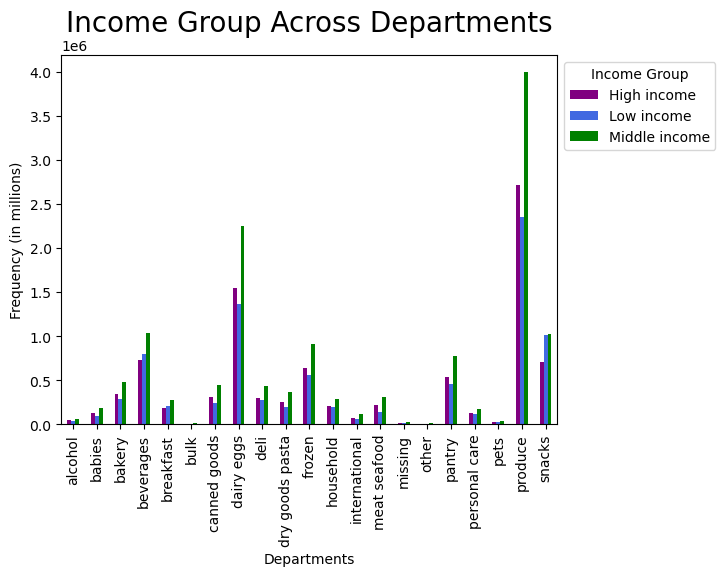

In [127]:
# Create a bar chart for income_group and Department
bar_income_department = income_department.plot(kind = 'bar', rot = 0, color = ['purple', 'royalblue', 'green'])
bar_income_department.legend(title = 'Income Group', bbox_to_anchor = (1, 1))
plt.title('Income Group Across Departments', fontsize = 20)
plt.ylabel('Frequency (in millions)')
plt.xlabel('Departments')
plt.xticks(rotation = 90)

In [62]:
# Compare family size across regions
family_region = pd.crosstab(df_high_activity['Region'], df_high_activity['household_size'], dropna = False)
family_region

household_size,Large Household,Medium Household,Single Household
Region,,,
Midwest,1787286,3651411,1822816
Northeast,1381233,2728970,1354482
South,2585864,5143342,2581933
West,2018133,3928644,1980450


Text(0.5, 0, 'Regions')

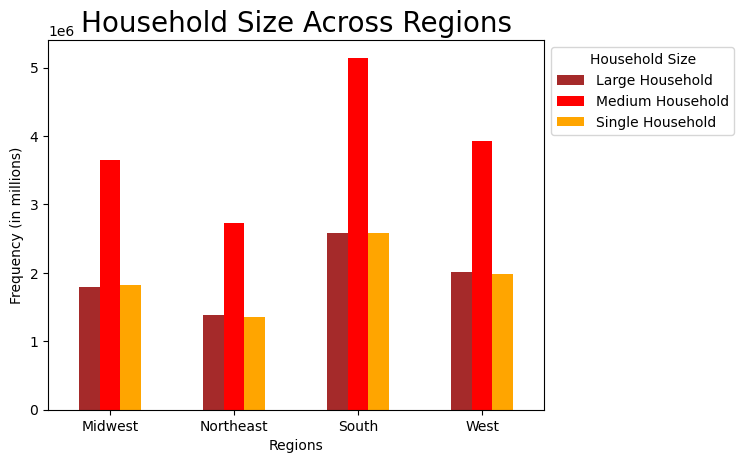

In [63]:
# Create a bar chart for family size and region
bar_family_region = family_region.plot(kind = 'bar', rot = 0, color = ['brown', 'red', 'orange'])

bar_family_region.legend(title = 'Household Size', bbox_to_anchor = (1, 1))
plt.title('Household Size Across Regions', fontsize = 20)
plt.ylabel('Frequency (in millions)')
plt.xlabel('Regions')

In [64]:
# Compare family size across departments
family_department = pd.crosstab(df_high_activity['Department'], df_high_activity['household_size'], dropna = False)
family_department

household_size,Large Household,Medium Household,Single Household
Department,,,
alcohol,37333,70467,36827
babies,102585,204479,103328
bakery,279822,559611,281395
beverages,640927,1285633,645341
breakfast,167322,337096,166432
bulk,8403,17048,8000
canned goods,255325,505729,251020
dairy eggs,1296264,2586542,1294376
deli,252592,497860,253382


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 [Text(0, 0, 'alcohol'),
  Text(1, 0, 'babies'),
  Text(2, 0, 'bakery'),
  Text(3, 0, 'beverages'),
  Text(4, 0, 'breakfast'),
  Text(5, 0, 'bulk'),
  Text(6, 0, 'canned goods'),
  Text(7, 0, 'dairy eggs'),
  Text(8, 0, 'deli'),
  Text(9, 0, 'dry goods pasta'),
  Text(10, 0, 'frozen'),
  Text(11, 0, 'household'),
  Text(12, 0, 'international'),
  Text(13, 0, 'meat seafood'),
  Text(14, 0, 'missing'),
  Text(15, 0, 'other'),
  Text(16, 0, 'pantry'),
  Text(17, 0, 'personal care'),
  Text(18, 0, 'pets'),
  Text(19, 0, 'produce'),
  Text(20, 0, 'snacks')])

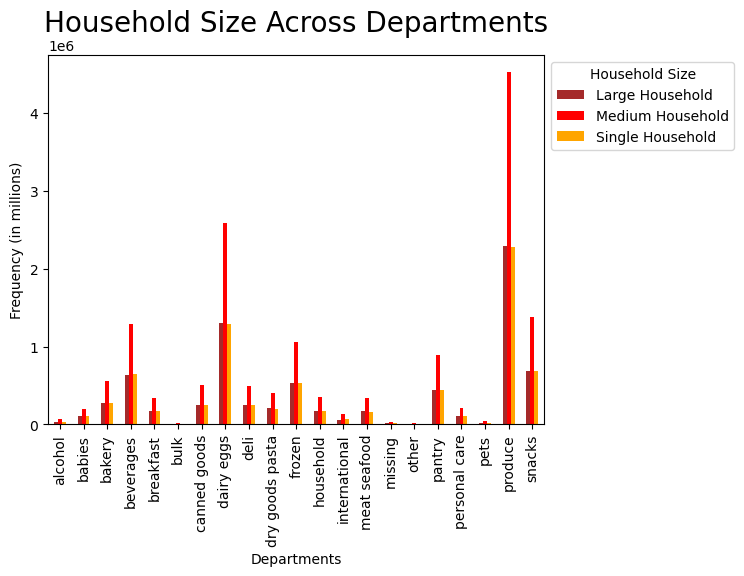

In [65]:
# Create a bar chart for family size and department
bar_family_department = family_department.plot(kind = 'bar', rot = 0, color = ['brown', 'red', 'orange'])
bar_family_department.legend(title = 'Household Size', bbox_to_anchor = (1, 1))
plt.title('Household Size Across Departments', fontsize = 20)
plt.ylabel('Frequency (in millions)')
plt.xlabel('Departments')
plt.xticks(rotation = 90)

## Observation:When comparing the customer profiles throughout the regions, the distribution is consistent, with South having the highest amount in each profile. Additionally, when comparing across departments, produce has the most orders in each profile. 

# 09.Additional Analysis

## 1)The sales team want to know whether there are particular times of the day when people spend the most money, as this might inform the type of products they advertise at these times.

(array([0, 1, 2]),
 [Text(0, 0, 'Most Orders'),
  Text(1, 0, 'Average Orders'),
  Text(2, 0, 'Fewest Orders')])

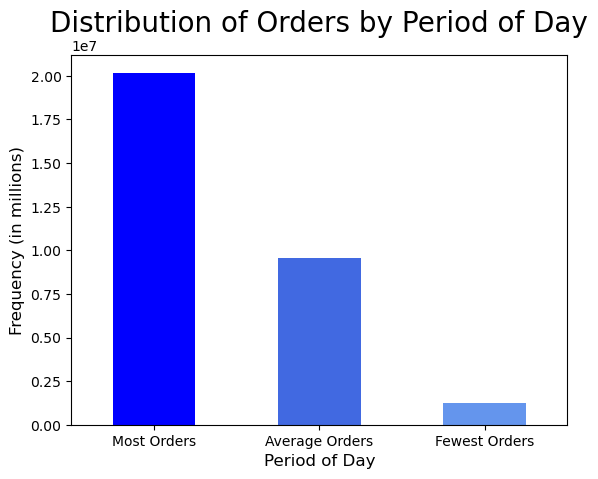

In [113]:
# Create a bar chart showing the busiest period of day
bar_busy_period = df_high_activity['busiest_period_of_day'].value_counts().plot.bar(color = ['blue','royalblue','cornflowerblue'])
plt.title('Distribution of Orders by Period of Day', fontsize = 20)
plt.ylabel('Frequency (in millions)', fontsize = 12)
plt.xlabel('Period of Day', fontsize = 12)
plt.xticks(rotation = 0)

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6')])

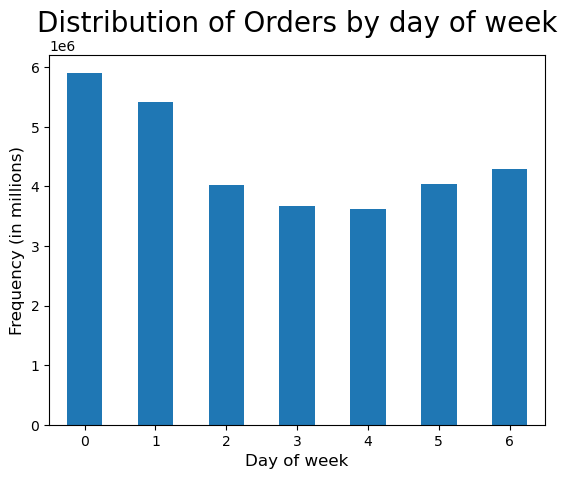

In [142]:
# Frequency of day of week ('order_day_of_week')
bar_busy_day = df_high_activity['order_day_of_week'].value_counts().sort_index().plot.bar()
plt.title('Distribution of Orders by day of week', fontsize = 20)
plt.ylabel('Frequency (in millions)', fontsize = 12)
plt.xlabel('Day of week', fontsize = 12)
plt.xticks(rotation = 0)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20'),
  Text(21, 0, '21'),
  Text(22, 0, '22'),
  Text(23, 0, '23')])

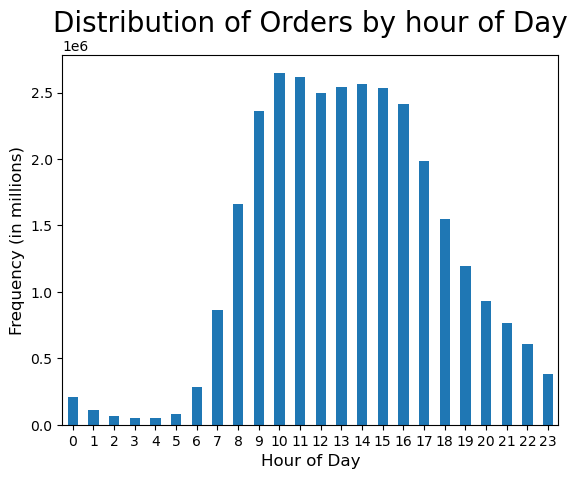

In [143]:
# Frequency of order hour of day ('order_hour_of_day')
bar_busy_hour = df_high_activity['order_hour_of_day'].value_counts().sort_index().plot.bar()
plt.title('Distribution of Orders by hour of Day', fontsize = 20)
plt.ylabel('Frequency (in millions)', fontsize = 12)
plt.xlabel('Hour of Day', fontsize = 12)
plt.xticks(rotation = 0)

## 2.Instacart has a lot of products with different price tags. Marketing and sales want to use simpler price range groupings to help direct their efforts.

(array([0, 1, 2]),
 [Text(0, 0, 'Medium-range product'),
  Text(1, 0, 'Low-range product'),
  Text(2, 0, 'High-range product')])

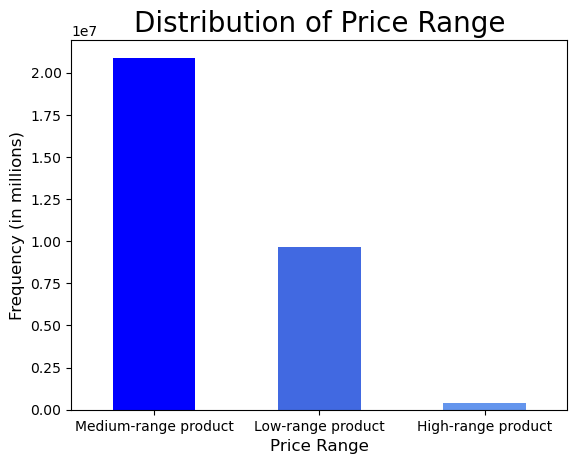

In [67]:
# Create a bar chart showing the distribution by price range
bar_price_range = df_high_activity['price_label'].value_counts().plot.bar(color = ['blue', 'royalblue', 'cornflowerblue'])

plt.title('Distribution of Price Range', fontsize = 20)
plt.ylabel('Frequency (in millions)', fontsize = 12)
plt.xlabel('Price Range', fontsize = 12)
plt.xticks(rotation = 0)

## 3.Are there certain types of products that are more popular than others? The only marketing and sales teams want to know which departments have the highest frequency of product orders.

In [68]:
# Show frequency count of department
df_high_activity['Department'].value_counts(dropna = False)

produce            9079273
dairy eggs         5177182
snacks             2766406
beverages          2571901
frozen             2121731
pantry             1782705
bakery             1120828
canned goods       1012074
deli               1003834
dry goods pasta     822136
household           699857
meat seafood        674781
breakfast           670850
personal care       424306
babies              410392
international       255991
alcohol             144627
pets                 93060
missing              64768
other                34411
bulk                 33451
Name: Department, dtype: int64

## 4. Are there differences in ordering habits based on a customer’s loyalty status?

In [69]:
# Compare loyalty status and day of week
loyalty_day = pd.crosstab(df_high_activity['order_day_of_week'], df_high_activity['Loyalty_Flag'], dropna = False)
loyalty_day

Loyalty_Flag,Loyalty customer,New customer,Regular customer
order_day_of_week,,,
0,1754731,984879,3169000
1,1843401,818902,2749383
2,1352343,625288,2047075
3,1266495,560418,1842622
4,1292042,535931,1797021
5,1456715,587718,1989296
6,1318366,690559,2282379


(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6')])

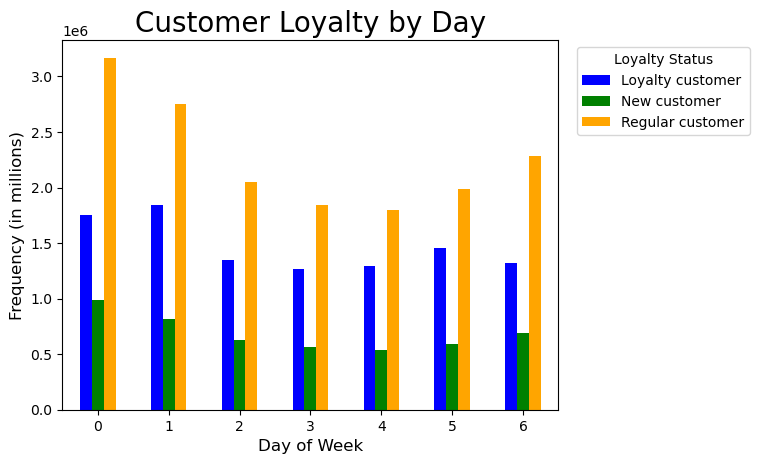

In [131]:
# Create a bar chart for Loyalty_flag and day of week
bar_loyalty_day = loyalty_day.plot(kind = 'bar', rot = 0, color = ['blue', 'green', 'orange'])
bar_loyalty_day.legend(title = 'Loyalty Status', bbox_to_anchor = (1.4,1))
plt.title('Customer Loyalty by Day', fontsize = 20)
plt.ylabel('Frequency (in millions)', fontsize = 12)
plt.xlabel('Day of Week', fontsize = 12)
plt.xticks(rotation = 0)

In [71]:
# Compare Loyalty status and period of day
loyalty_hour= pd.crosstab(df_high_activity['Loyalty_Flag'], df_high_activity['busiest_period_of_day'], dropna = False)
loyalty_hour

busiest_period_of_day,Average Orders,Fewest Orders,Most Orders
Loyalty_Flag,,,
Loyalty customer,3164776,405718,6713599
New customer,1480601,192436,3130658
Regular customer,4905433,634744,10336599


(array([0, 1, 2]),
 [Text(0, 0, 'Loyalty customer'),
  Text(1, 0, 'New customer'),
  Text(2, 0, 'Regular customer')])

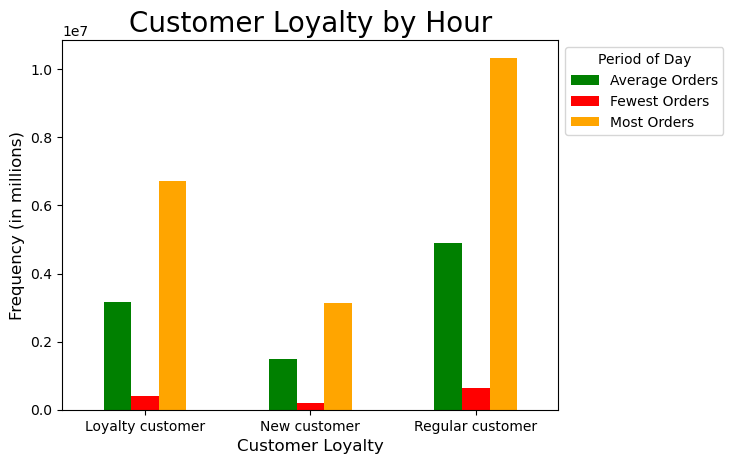

In [72]:
# Create a bar chart for Loyalty_flag and busiest_period_of_day
bar_loyalty_hour = loyalty_hour.plot(kind = 'bar', rot = 0, color = ['green', 'red', 'orange'])
bar_loyalty_hour.legend(title = 'Period of Day', bbox_to_anchor = (1, 1))
plt.title('Customer Loyalty by Hour', fontsize = 20)
plt.ylabel('Frequency (in millions)', fontsize = 12)
plt.xlabel('Customer Loyalty', fontsize = 12)
plt.xticks(rotation = 0)

In [73]:
# Compare loyalty customers across departments
loyalty_department= pd.crosstab(df_high_activity['Department'], df_high_activity['Loyalty_Flag'], dropna = False)
loyalty_department

Loyalty_Flag,Loyalty customer,New customer,Regular customer
Department,,,
alcohol,38723,28629,77275
babies,167108,46708,196576
bakery,379873,172104,568851
beverages,855017,396649,1320235
breakfast,221577,106179,343094
bulk,13834,4149,15468
canned goods,294594,180196,537284
dairy eggs,1830707,750056,2596419
deli,324046,158335,521453


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 [Text(0, 0, 'alcohol'),
  Text(1, 0, 'babies'),
  Text(2, 0, 'bakery'),
  Text(3, 0, 'beverages'),
  Text(4, 0, 'breakfast'),
  Text(5, 0, 'bulk'),
  Text(6, 0, 'canned goods'),
  Text(7, 0, 'dairy eggs'),
  Text(8, 0, 'deli'),
  Text(9, 0, 'dry goods pasta'),
  Text(10, 0, 'frozen'),
  Text(11, 0, 'household'),
  Text(12, 0, 'international'),
  Text(13, 0, 'meat seafood'),
  Text(14, 0, 'missing'),
  Text(15, 0, 'other'),
  Text(16, 0, 'pantry'),
  Text(17, 0, 'personal care'),
  Text(18, 0, 'pets'),
  Text(19, 0, 'produce'),
  Text(20, 0, 'snacks')])

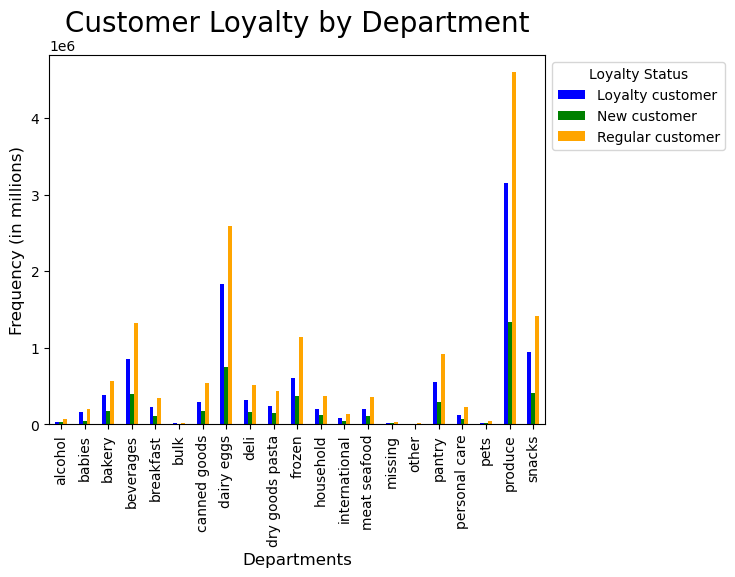

In [132]:
# Create a bar chart for Loyalty_flag and departments
bar_loyalty_department = loyalty_department.plot(kind = 'bar', rot = 0, color = ['blue', 'green', 'orange'])
bar_loyalty_department.legend(title = 'Loyalty Status', bbox_to_anchor = (1, 1))
plt.title('Customer Loyalty by Department', fontsize = 20)
plt.ylabel('Frequency (in millions)', fontsize = 12)
plt.xlabel('Departments', fontsize = 12)
plt.xticks(rotation = 90)

## 5. Are there differences in ordering habits based on a customer’s region?

In [84]:
# Compare orders by region and day_of_week
region_dow = pd.crosstab(df_high_activity['order_day_of_week'], df_high_activity['Region'], dropna = False)
region_dow

Region,Midwest,Northeast,South,West
order_day_of_week,,,,
0,1390189,1043698,1955352,1519371
1,1263655,954332,1808348,1385351
2,947370,713159,1340387,1023790
3,855316,649305,1229002,935912
4,851501,637781,1205497,930215
5,943396,716128,1342849,1031356
6,1010086,750282,1429704,1101232


(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6')])

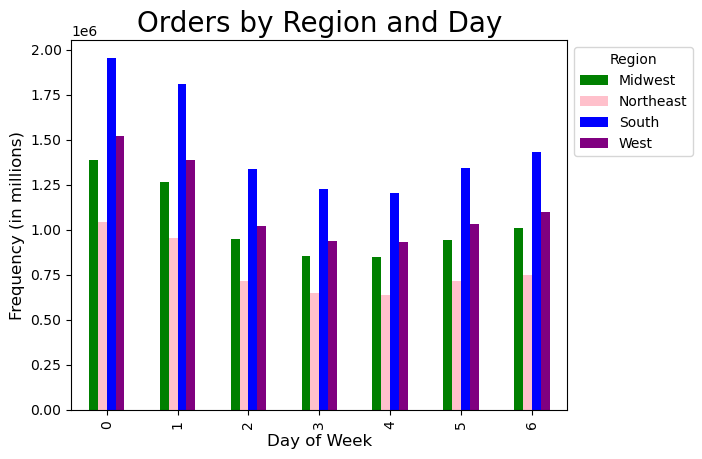

In [134]:
# Create a bar chart for region and day_of_week
bar_region_dow= region_dow.plot(kind = 'bar', rot = 0, color = ['green', 'pink', 'blue', 'purple'])
bar_region_dow.legend(title = 'Region', bbox_to_anchor = (1, 1))
plt.title('Orders by Region and Day', fontsize = 20)
plt.ylabel('Frequency (in millions)', fontsize = 12)
plt.xlabel('Day of Week', fontsize = 12)
plt.xticks(rotation = 90)

In [89]:
# Compare orders by region and hour group
region_hour = pd.crosstab(df_high_activity['busiest_period_of_day'], df_high_activity['Region'], dropna = False)
region_hour

Region,Midwest,Northeast,South,West
busiest_period_of_day,,,,
Average Orders,2250470,1682688,3190331,2427321
Fewest Orders,285815,222249,414122,310712
Most Orders,4725228,3559748,6706686,5189194


(array([0, 1, 2]),
 [Text(0, 0, 'Average Orders'),
  Text(1, 0, 'Fewest Orders'),
  Text(2, 0, 'Most Orders')])

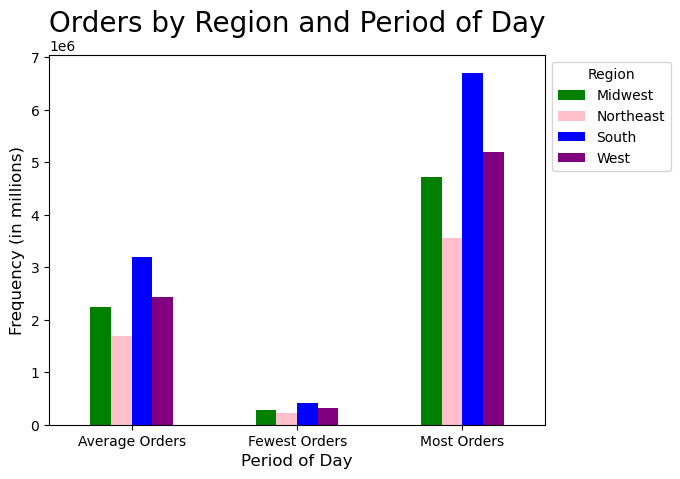

In [135]:
# Create a bar chart for region and hour group
bar_region_hour = region_hour.plot(kind = 'bar', rot = 0, color = ['green', 'pink', 'blue', 'purple'])
bar_region_hour.legend(title = 'Region', bbox_to_anchor = (1, 1))
plt.title('Orders by Region and Period of Day', fontsize = 20)
plt.ylabel('Frequency (in millions)', fontsize = 12)
plt.xlabel('Period of Day', fontsize = 12)
plt.xticks(rotation = 0)

In [91]:
# Compare orders by region and department
region_department = pd.crosstab(df_high_activity['Department'], df_high_activity['Region'], dropna = False)
region_department

Region,Midwest,Northeast,South,West
Department,,,,
alcohol,34043,25017,48813,36754
babies,95741,72712,139511,102428
bakery,261753,199300,371620,288155
beverages,598979,462929,859419,650574
breakfast,156155,117904,223172,173619
bulk,7929,5599,11180,8743
canned goods,237459,176936,337458,260221
dairy eggs,1212490,914616,1723016,1327060
deli,234464,178398,333620,257352


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 [Text(0, 0, 'alcohol'),
  Text(1, 0, 'babies'),
  Text(2, 0, 'bakery'),
  Text(3, 0, 'beverages'),
  Text(4, 0, 'breakfast'),
  Text(5, 0, 'bulk'),
  Text(6, 0, 'canned goods'),
  Text(7, 0, 'dairy eggs'),
  Text(8, 0, 'deli'),
  Text(9, 0, 'dry goods pasta'),
  Text(10, 0, 'frozen'),
  Text(11, 0, 'household'),
  Text(12, 0, 'international'),
  Text(13, 0, 'meat seafood'),
  Text(14, 0, 'missing'),
  Text(15, 0, 'other'),
  Text(16, 0, 'pantry'),
  Text(17, 0, 'personal care'),
  Text(18, 0, 'pets'),
  Text(19, 0, 'produce'),
  Text(20, 0, 'snacks')])

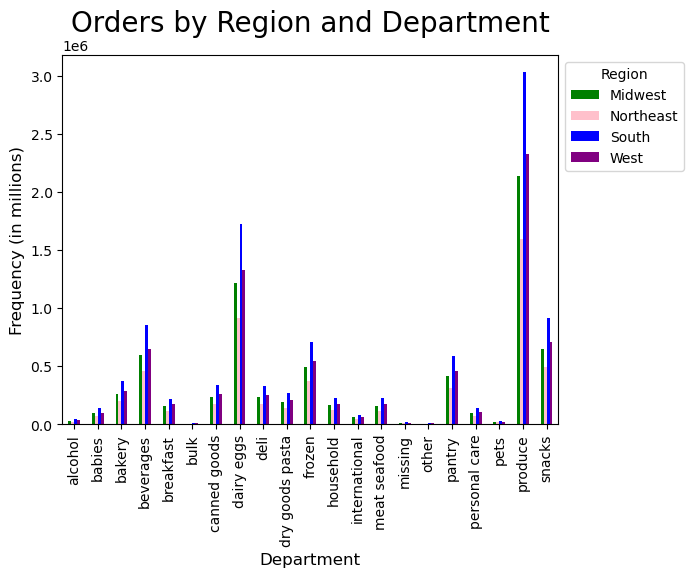

In [136]:
# Create a bar chart for region and department
bar_region_department = region_department.plot(kind = 'bar', rot = 0, color = ['green', 'pink', 'blue', 'purple'])
bar_region_department.legend(title = 'Region', bbox_to_anchor = (1, 1))
plt.title('Orders by Region and Department', fontsize = 20)
plt.ylabel('Frequency (in millions)', fontsize = 12)
plt.xlabel('Department', fontsize = 12)
plt.xticks(rotation = 90)

## 6. Is there a connection between age and family status in terms of ordering habits?

In [98]:
# Compare orders by age group and family status
age_family = pd.crosstab(df_high_activity['age_group'], df_high_activity['Family_status'], dropna = False)
age_family

Family_status,divorced/widowed,living with parents and siblings,married,single
age_group,,,,
Middle-Aged,623313,0,9046762,2433835
Senior,2021958,0,6173586,0
Young Adult,0,1481172,6523363,2660575


Text(0.5, 0, 'Age Group')

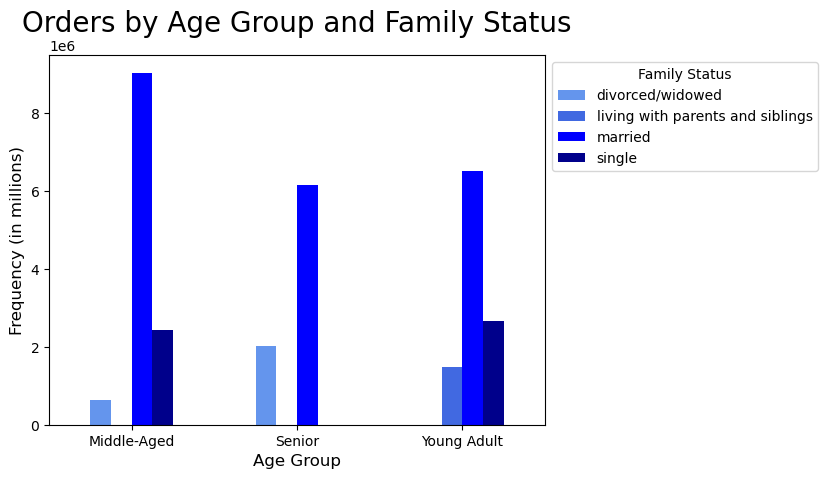

In [102]:
# Create a bar chart for age and family status
bar_age_family = age_family.plot(kind = 'bar', rot = 0, color = ['cornflowerblue','royalblue', 'blue', 'darkblue'])
bar_age_family.legend(title = 'Family Status', bbox_to_anchor = (1, 1))
plt.title('Orders by Age Group and Family Status', fontsize = 20)
plt.ylabel('Frequency (in millions)', fontsize = 12)
plt.xlabel('Age Group', fontsize = 12)

## 7. What different classifications does the demographic information suggest? Age? Income? Certain types of goods? Family status?

(array([       0.,  5000000., 10000000., 15000000., 20000000., 25000000.]),
 [Text(0.0, 0, '0.0'),
  Text(5000000.0, 0, '0.5'),
  Text(10000000.0, 0, '1.0'),
  Text(15000000.0, 0, '1.5'),
  Text(20000000.0, 0, '2.0'),
  Text(25000000.0, 0, '2.5')])

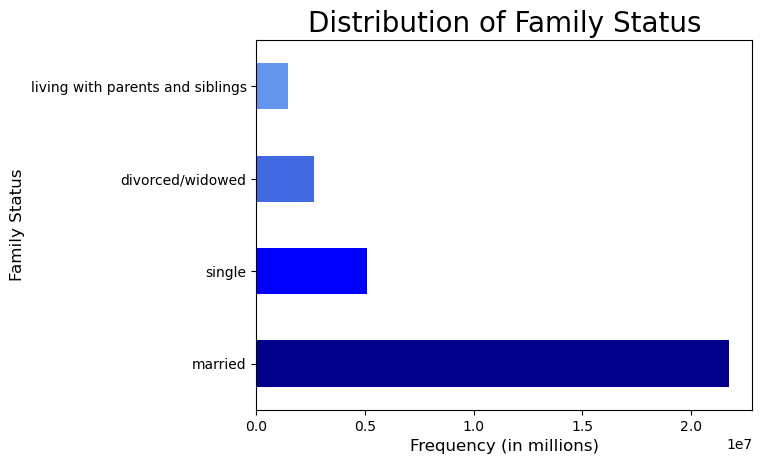

In [120]:
# Create a bar chart for family status
bar_family_status = df_high_activity['Family_status'].value_counts().plot(kind='barh',color=['darkblue','blue','royalblue','cornflowerblue'])

plt.title('Distribution of Family Status', fontsize = 20)
plt.ylabel('Family Status', fontsize = 12)
plt.xlabel('Frequency (in millions)', fontsize = 12)
plt.xticks(rotation = 0)

# 10.Exporting

In [107]:
# Exporting Dataframes

In [108]:
df_high_activity.to_pickle(os.path.join(path,'Prepared Data', 'final_cust_prods_ords.pkl'))
df_department.to_pickle(os.path.join(path, 'Prepared Data', 'final_department.pkl'))

In [110]:
# Exporting Visualizations

In [139]:
bar_age_group.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'distribution_age_group.png'))
bar_income_group.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'distribution_income_group.png'))
bar_household_size.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'distribution_household_size.png'))
bar_departments.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'distribution_department_products.png'))
bar_age_region.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_age_region.png'))


In [140]:
bar_age_department.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_age_department.png'))
bar_income_region.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_income_region.png'))
bar_income_department.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_income_department.png'))
bar_family_region.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_family_region.png'))
bar_family_department.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_family_department.png'))


In [144]:
bar_busy_period.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_busy_period.png'))
bar_busy_day.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_busy_day.png'))
bar_busy_hour.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_busy_hour.png'))
bar_price_range.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_price_range.png'))
bar_loyalty_day.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_loyalty_day.png'))
bar_loyalty_hour.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_loyalty_hour.png'))


In [145]:
bar_loyalty_department.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_loyalty_department.png'))
bar_region_dow.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_region_dow.png'))
bar_region_hour.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_region_hour.png'))
bar_region_department.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_region_department.png'))
bar_age_family.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_age_family.png'))
bar_family_status.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_family_status.png'))